# Numerical Features dataset generation

In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

housing = sklearn.datasets.fetch_california_housing(as_frame=True)

In [2]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
housing['data'].head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
housing['target'].head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [5]:
# Split the data into training and testing sets
X_train, X_test_val, y_train, y_test_val = sklearn.model_selection.train_test_split(housing['data'], housing['target'], test_size=0.4, random_state=42)
print(f'Train shape X: {X_train.shape}; target: {y_train.shape}')
print(f'Test&eval shape X: {X_test_val.shape}; target: {y_test_val.shape}')

Train shape X: (12384, 8); target: (12384,)
Test&eval shape X: (8256, 8); target: (8256,)


In [6]:
X_val, X_test, y_val, y_test = sklearn.model_selection.train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)
print(f'Validation shape X: {X_val.shape}; target: {y_val.shape}')
print(f'Test shape X: {X_test.shape}; target: {y_test.shape}')

Validation shape X: (4128, 8); target: (4128,)
Test shape X: (4128, 8); target: (4128,)


In [7]:
X_train.to_csv('X_train_housing.csv', index=False)
X_val.to_csv('X_val_housing.csv', index=False)
X_test.to_csv('X_test_housing.csv', index=False)

y_train.to_csv('y_train_housing.csv', index=False)
y_val.to_csv('y_val_housing.csv', index=False)
y_test.to_csv('y_test_housing.csv', index=False)

# Baseline model to compare

In [8]:
# Concatenate train and validation sets
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

print(f"Combined training set shape: {X_train_full.shape}")

# Create and fit linear regression model on combined training data
lr_model = sklearn.linear_model.LinearRegression()
lr_model.fit(X_train_full, y_train_full)

# Make predictions on training and test sets
y_train_pred = lr_model.predict(X_train_full)
y_test_pred = lr_model.predict(X_test)

# Calculate metrics
train_rmse = sklearn.metrics.root_mean_squared_error(y_train_full, y_train_pred)
test_rmse = sklearn.metrics.root_mean_squared_error(y_test, y_test_pred)

print("\nMetrics:")
print(f"Train RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

# Feature coefficients
feature_coefficients = pd.DataFrame({
    'Feature': X_train_full.columns,
    'Coefficient': [f"{coef:.3f}" for coef in lr_model.coef_]
})

print("\nFeature Coefficients:")
print(feature_coefficients)

Combined training set shape: (16512, 8)

Metrics:
Train RMSE: 0.720
Test RMSE: 0.743

Feature Coefficients:
      Feature Coefficient
0      MedInc       0.445
1    HouseAge       0.010
2    AveRooms      -0.123
3   AveBedrms       0.780
4  Population      -0.000
5    AveOccup      -0.004
6    Latitude      -0.418
7   Longitude      -0.434


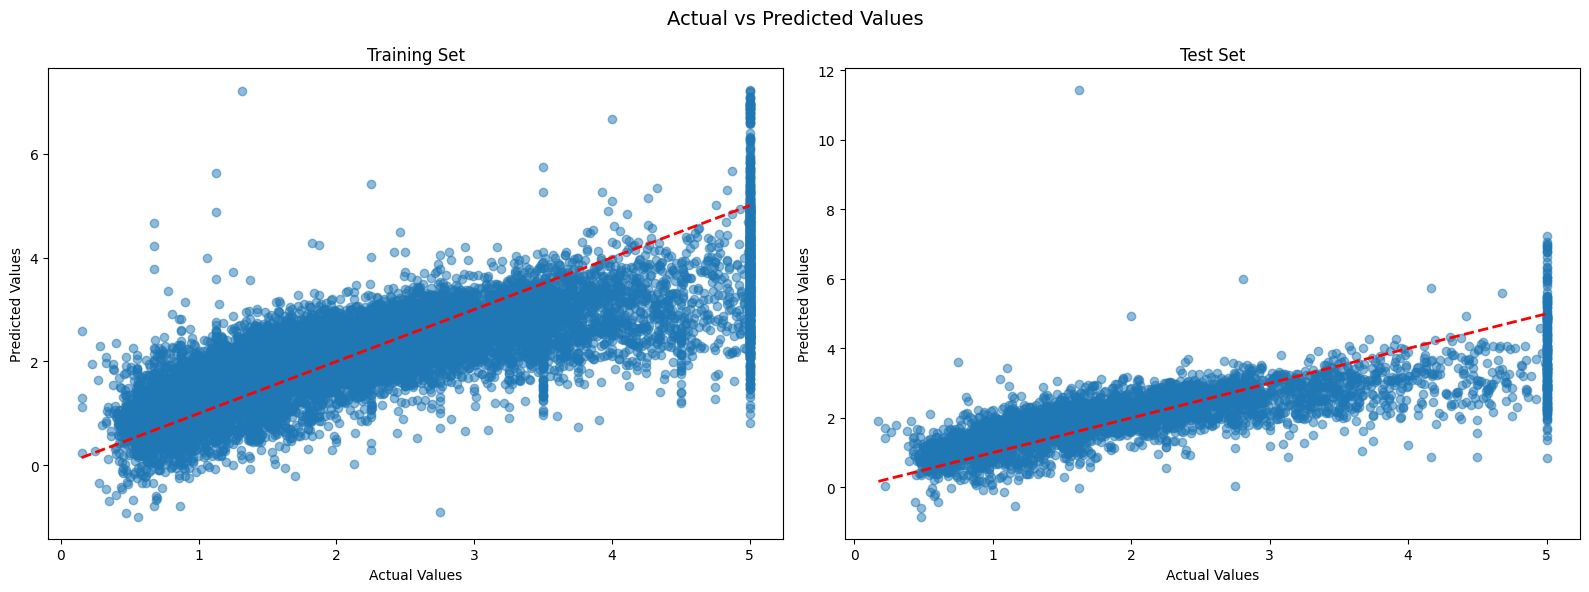

In [9]:
# Plot actual vs predicted values for train and test sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Training set plot
ax1.scatter(y_train_full, y_train_pred, alpha=0.5)
ax1.plot([y_train_full.min(), y_train_full.max()], [y_train_full.min(), y_train_full.max()], 'r--', lw=2)
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Training Set')

# Test set plot
ax2.scatter(y_test, y_test_pred, alpha=0.5)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Test Set')

fig.suptitle('Actual vs Predicted Values', fontsize=14)

plt.tight_layout()
plt.show()